References


[NLP: Twitter Sentiment Analysis](https://coursera.org/share/28e75fc0f6d4e5416889515502a959e9)


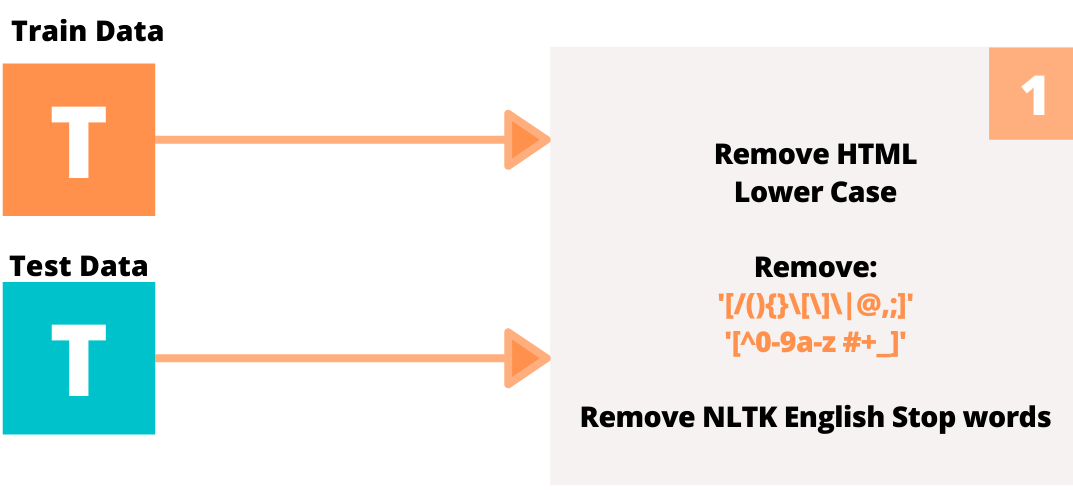

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

#import nltk
#nltk.download('stopwords')

In [ ]:
DATA_DEFI_PATH ='/content/gdrive/My Drive/defi-ia-insa-toulouse/' 

In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

#Include: personal pronouns and possessive pronouns gender indicators
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

non_preprocessed_train = pd.read_json(DATA_DEFI_PATH+"train.json").set_index('Id')
non_preprocessed_train['cleaned_Data'] = non_preprocessed_train['description'].apply(lambda x: clean_text(x))
non_preprocessed_train.to_csv('PreprocessedDataTrain.csv', index=False)

non_preprocessed_test = pd.read_json(DATA_DEFI_PATH+"test.json").set_index('Id')
non_preprocessed_test['cleaned_Data'] = non_preprocessed_test['description'].apply(lambda x: clean_text(x))
non_preprocessed_test.to_csv('PreprocessedDataTest.csv', index=False)